## Customer Churn Prediction using Artificial Neural Network(ANN)
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model and see the confusion matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
%matplotlib inline

In [2]:
# Loading dataset, provided by kaggle
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
#Display first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cleaning data 

In [4]:
# dropping customerID column as it does not provide any information regarding churn
df.drop('customerID', axis ='columns', inplace =  True)

In [34]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Observing that values in column TotalCharges is an Object and this has to be converted to numeric
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [13]:
# Below error is due to presence of blank string 
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [14]:
# to supress errors we need to use coerce
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [35]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
# Observing that there are only 11 records with Null string, as this is very less record when compare to total dataset, I am considering to drop these rows
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [18]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [5]:
df = df[df.TotalCharges != ' ']

In [37]:
df.shape

(7032, 20)

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [26]:
df.TotalCharges.dtypes

dtype('float64')

# Data Visualization

In [34]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [30]:
tenure_churn_yes = df[df.Churn=='Yes'].tenure
tenure_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

Text(0.5, 1.0, 'Customer churn visualization based on Tenure')

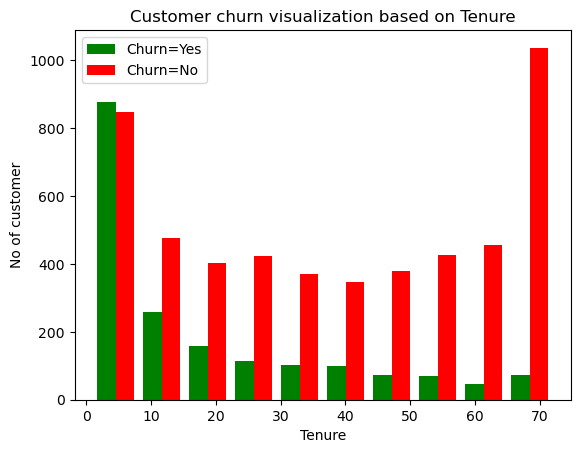

In [43]:
mat.hist([tenure_churn_yes, tenure_churn_no], color = ['green','red'], label=['Churn=Yes','Churn=No'])
mat.legend()
mat.xlabel("Tenure")
mat.ylabel("No of customer")
mat.title("Customer churn visualization based on Tenure")

In [42]:
monthly_churn_no = df[df.Churn=='No'].MonthlyCharges
monthly_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

Text(0.5, 1.0, 'Customer churn visualization based on MonthlyCharges')

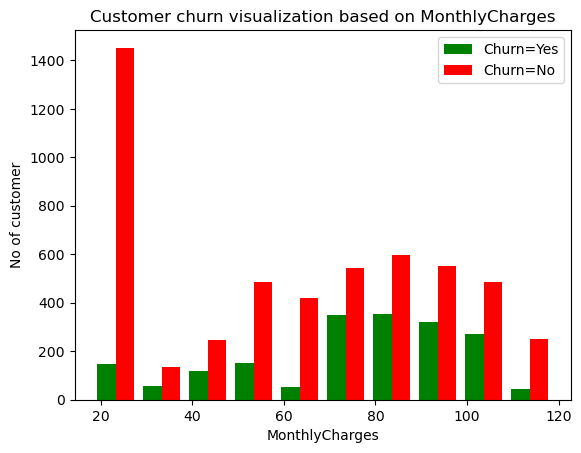

In [44]:
mat.hist([monthly_churn_yes, monthly_churn_no], color = ['green','red'], label=['Churn=Yes','Churn=No'])
mat.legend()
mat.xlabel("MonthlyCharges")
mat.ylabel("No of customer")
mat.title("Customer churn visualization based on MonthlyCharges")

In [39]:
#Many of the columns are yes, no etc. Let's print unique values in object columns to see data values.
for column in df :
    print(f'{column} :{df[column].unique()}')

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 

In [8]:
def print_unique_column_values(df):
    for column in df :
        if df[column].dtypes == 'object':
            print(f'{column} :{df[column].unique()}')

In [9]:
print_unique_column_values(df)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [7]:
df.replace('No internet service', 'No', inplace = True)

In [8]:
df.replace('No phone service', 'No', inplace = True)

In [42]:
print_unique_column_values(df)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [9]:
#Converting Yes and No to 1 and 0 respectively
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for columns in yes_no_columns:
    df[columns].replace({'Yes': 1,'No':0} , inplace = True)

C:\Users\dev\AppData\Local\Temp\ipykernel_15392\2090797864.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columns].replace({'Yes': 1,'No':0} , inplace = True)
C:\Users\dev\AppData\Local\Temp\ipykernel_15392\2090797864.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns].replace({'

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [46]:
for column in df :
    print(f'{column} :{df[column].unique()}')

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[0 1]
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :[1 0]
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]


In [11]:
df['gender'].replace({'Female': 1,'Male':0} , inplace = True)

C:\Users\dev\AppData\Local\Temp\ipykernel_15392\1158194915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female': 1,'Male':0} , inplace = True)
C:\Users\dev\AppData\Local\Temp\ipykernel_15392\1158194915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].rep

In [48]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [12]:
#One hot encoding for categorical columns
df_encoding = pd.get_dummies(data =df, columns=['InternetService','Contract','PaymentMethod'], dtype = int)

In [56]:
df_encoding.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4297,1,0,0,0,45,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1
7025,1,0,0,0,18,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4320,0,0,1,0,71,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [13]:
#MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range
columns_toscale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_encoding[columns_toscale]= scaler.fit_transform(df_encoding[columns_toscale])

In [58]:
df_encoding.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
518,1,1,1,0,0.366197,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
833,1,0,1,1,0.507042,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
271,0,0,1,0,0.788732,1,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0


In [60]:
for column in df_encoding :
    print(f'{column} :{df_encoding[column].unique()}')

gender :[1 0]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[

# Train test split

In [14]:
X = df_encoding.drop('Churn', axis = 'columns')
y = df_encoding['Churn']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =5)

In [16]:
X_train.shape

(5625, 26)

In [64]:
X_test.shape

(1407, 26)

In [65]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [66]:
len(X_train.columns)

26

# Build a model (ANN) in tensorflow/keras

In [69]:
import tensorflow as tf
from tensorflow import keras

model =  keras.Sequential([
    keras.layers.Dense(20, input_shape=(26), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

ModuleNotFoundError: No module named 'tensorflow'

In [68]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.0 MB 10.9 MB/s eta 0:00:36
   ---------------------------------------- 1.6/385.0 MB 17.3 MB/s eta 0:00:23
   ---------------------------------------- 2.7/385.0 MB 21.8 MB/s eta 0:00:18
   ---------------------------------------- 3.6/385.0 MB 20.8 MB/s eta 0:00:19
   ---------------------------------------- 4.7/385.0 MB 21.4 MB/s eta 0:00:18
    --------------------------------------- 5.7/385.0 MB 20.4 MB/s eta 0:00:19
    --------------------------------------- 6.8/385.0 MB 21.9 MB/s eta 0:00:18
    --------------------------------------- 7.8/385.0 MB 21.7 MB/s eta 0:00:18
    --------------------------------------- 8.6/385.0 MB 21.1 MB/s 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
#first try we epoch 5 and check the acuracy
import tensorflow as tf
from tensorflow import keras

model =  keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adamax',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


C:\Users\dev\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.6006 - loss: 0.6454
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7509 - loss: 0.4772
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7781 - loss: 0.4456
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7979 - loss: 0.4224
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.7978 - loss: 0.4190
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8055 - loss: 0.4191
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.7957 - loss: 0.4191
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8017 - loss: 0.4071
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8034 - loss: 0.4074
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7988 - loss: 0.4243
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7986 - loss: 0.4179
Epoch 12/100
176/176 ━━━━━━━━━━

In [23]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.7975 - loss: 0.4439


[0.45130622386932373, 0.7825160026550293]

In [24]:
y_predicted = model.predict(X_test)
y_predicted[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.18315111],
       [0.6013877 ],
       [0.0052053 ],
       [0.7345054 ],
       [0.46369532]], dtype=float32)

In [25]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [27]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

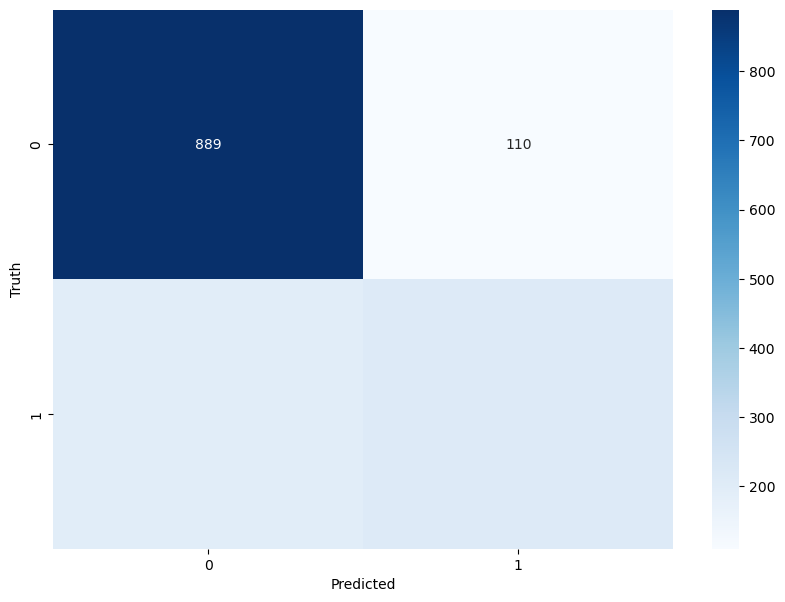

In [36]:
import seaborn as sn
from matplotlib.colors import LinearSegmentedColormap
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

mat.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

mat.xlabel('Predicted')
mat.ylabel('Truth')

In [31]:
y_test.shape

(1407,)